In [1]:
import numpy as np
import matplotlib.pyplot as plt

from system import System

In [2]:
r_s = np.array([0., 0.])
r_t = np.array([3., 0.])

rho = np.array([0.5, 0.5, 0.5, 0.5])
m = np.array([250., 25., 25., 180.])
I = np.array([25., 2.5, 2.5, 18.])
b = np.array([1., 1., 1.])

# y0 = np.zeros(6)
y0 = np.array([0., 0., 0., 0., np.deg2rad(5.), np.deg2rad(10.), 0., np.deg2rad(-5.)])

parameters = dict(r_s=r_s,
                  r_t=r_t,
                  rho=rho,
                  m=m,
                  I=I,
                  b=b)

sys = System(y0, parameters)

In [3]:
sol = sys.run()

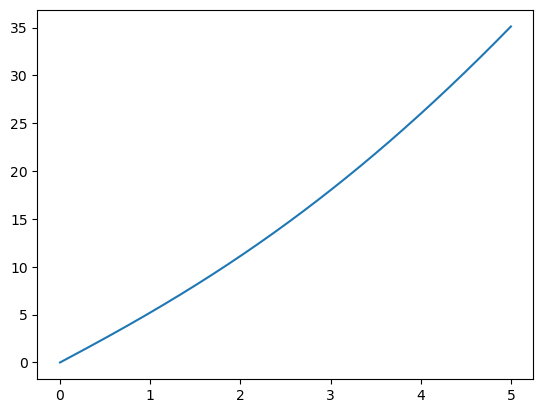

In [4]:
plt.plot(sol.t, np.rad2deg(sol.y[:, 0]))
plt.show()

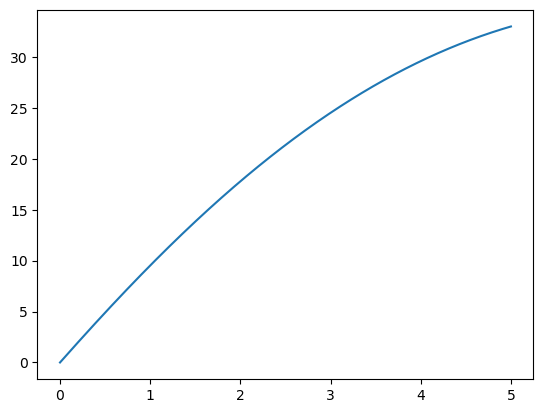

In [5]:
plt.plot(sol.t, np.rad2deg(sol.y[:, 1]))
plt.show()

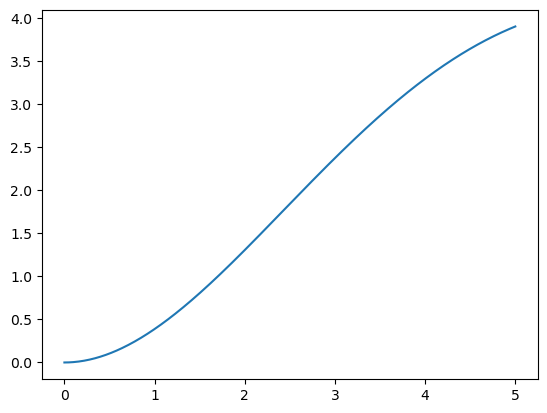

In [6]:
plt.plot(sol.t, np.rad2deg(sol.y[:, 2]))
plt.show()

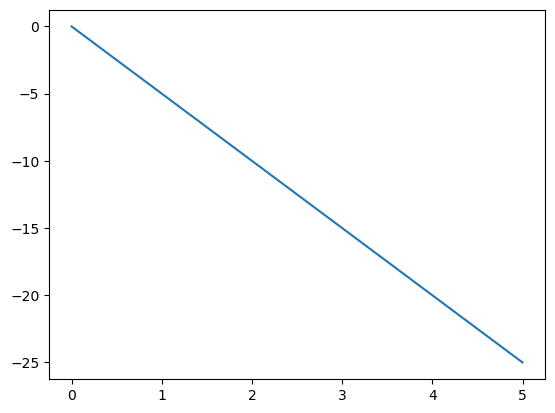

In [7]:
plt.plot(sol.t, np.rad2deg(sol.y[:, 3]))
plt.show()

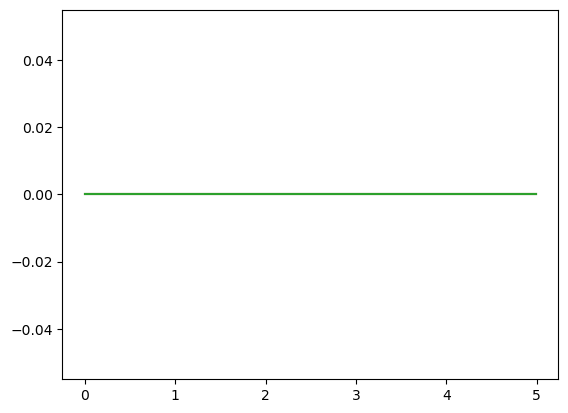

In [8]:
plt.plot(sol.t[:-1], sol.u)
plt.show()

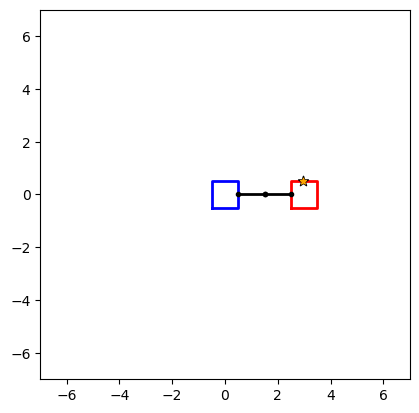

In [10]:
from matplotlib.animation import FuncAnimation
# import matplotlib.patches as patches
from IPython.display import HTML

t = sol.t
y = sol.y

C = lambda th: np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
r_0 = lambda th_s: r_s + C(th_s)@np.array([rho[0], 0.])
r_1 = lambda th_s, th_1: r_0(th_s) + C(th_s)@C(th_1)@np.array([2.*rho[1], 0.])
r_2 = lambda th_s, th_1, th_2: r_1(th_s, th_1) + C(th_s)@C(th_1)@C(th_2)@np.array([2.*rho[2], 0.])
r_c = lambda th: r_t + C(th)@np.array([0., rho[3]])

fig, ax = plt.subplots()
ax.set_xlim(-7., 7.)
ax.set_ylim(-7., 7.)
ax.set_aspect('equal')

main_sat_verts = np.array([
    [-rho[0], -rho[0]],
    [rho[0], -rho[0]],
    [rho[0], rho[0]],
    [-rho[0], rho[0]],
    [-rho[0], -rho[0]]
])

targ_sat_verts = np.array([
    [-rho[3], -rho[3]],
    [rho[3], -rho[3]],
    [rho[3], rho[3]],
    [-rho[3], rho[3]],
    [-rho[3], -rho[3]]
])

pt = r_c(y[0, 4])

main_sat, = ax.plot([], [], 'b-', lw=2)
p1 = ax.scatter(pt[0], pt[1], 55, 'black', '*', zorder=6)
p2 = ax.scatter(pt[0], pt[1], 20, 'orange', '*', zorder=7)
targ_sat, = ax.plot([], [], 'r-', lw=2)
arm1, = ax.plot([], [], 'k.-', lw=2)
arm2, = ax.plot([], [], 'k.-', lw=2)

def init():
    r0 = r_0(y[0, 0])
    r1 = r_1(y[0, 0], y[0, 1])
    r2 = r_2(y[0, 0], y[0, 1], y[0, 2])
    rc = r_c(y[0, 4])

    main_verts = r_s[:, None] + C(y[0, 0])@main_sat_verts.T
    targ_verts = r_t[:, None] + C(y[0, 3])@targ_sat_verts.T

    main_sat.set_data(main_verts[0, :], main_verts[1, :])
    targ_sat.set_data(targ_verts[0, :], targ_verts[1, :])
    arm1.set_data([r0[0], r1[0]], [r0[1], r1[1]])
    arm2.set_data([r1[0], r2[0]], [r1[1], r2[1]])
    p1.set_offsets([rc[0], rc[1]])
    p2.set_offsets([rc[0], rc[1]])

    return main_sat, targ_sat, arm1, arm2, p1, p2

def update(i):
    th_s = y[i, 0]
    th_1 = y[i, 1]
    th_2 = y[i, 2]
    th_t = y[i, 3]

    r0 = r_0(th_s)
    r1 = r_1(th_s, th_1)
    r2 = r_2(th_s, th_1, th_2)
    rc = r_c(th_t)

    main_verts = r_s[:, None] + C(th_s)@main_sat_verts.T
    targ_verts = r_t[:, None] + C(th_t)@targ_sat_verts.T

    main_sat.set_data(main_verts[0, :], main_verts[1, :])
    targ_sat.set_data(targ_verts[0, :], targ_verts[1, :])
    arm1.set_data([r0[0], r1[0]], [r0[1], r1[1]])
    arm2.set_data([r1[0], r2[0]], [r1[1], r2[1]])
    p1.set_offsets([rc[0], rc[1]])
    p2.set_offsets([rc[0], rc[1]])

    return main_sat, targ_sat, arm1, arm2, p1, p2

ani = FuncAnimation(fig, update, frames=range(0, len(t), 10), init_func=init, blit=False, interval=50)

ani.save('milestone_1.mp4')